# Electron transport through a narrow channel with a scattering centre.

The quantization resulting from confinement affects significantly the electron transport on nanostructures. The first experimental observation of the conductance quantization was in the Quantum Point Contact structure, where the electrons were traveling through a very narrow channel created by the split-gate structure. Here we will analyze how the presence of a single or multiple scattering centres inside the channel affects the transport properties of the system.

First step is initializing all the necessary tools and physical units used in this research.

In [1]:
# import of necessary libraries

import kwant

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import scipy.linalg as la
from math import atan2, pi, sqrt, exp
from scipy.constants import physical_constants
import random

from ipywidgets import interact

C:\Users\1\Anaconda3\lib\site-packages\kwant\solvers\default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [2]:
# important physical units

h_bar = physical_constants['Planck constant over 2 pi'][0]  #J*s  
m_el = physical_constants['electron mass'][0]          #kg
eV_unit = physical_constants['electron volt'][0]      #J
m_ef = 0.067 * m_el
a_unit = 10 * 10**(-9)            #m   

t_unit_J = h_bar**(2)/(2*m_ef*a_unit**2)  #in the units of J 
t_unit_eV = t_unit_J/eV_unit #in the units of eV

In [3]:
# basic parameters used in the systems
a=1   
t = 1
size = 81 # basic size of the systems

# basic potential, without additional onsite energy
def potential_1(site):
    #x, y = site.pos
    return 4 * t

For the research, we need to create a rectangular system with 80 x 80 sites, which simulates a narrow channel through which electron will travel. The system will also consist of two contacts, one on the left and one on the right side.

In [4]:
# initializing the first system
sys_1 = kwant.Builder()
lat_1 = kwant.lattice.square(a, norbs = 1)

sys_1[(lat_1(x, y) for x in range(size) for y in range(size))] = potential_1
sys_1[lat_1.neighbors()] = -t

leadl_1 = kwant.Builder(kwant.TranslationalSymmetry((-a,0)))    
leadl_1[[lat_1(0, i) for i in range(size)]] = potential_1
leadl_1[lat_1.neighbors()] = -t

sys_1.attach_lead(leadl_1)
sys_1.attach_lead(leadl_1.reversed())

sysf_1 = sys_1.finalized()

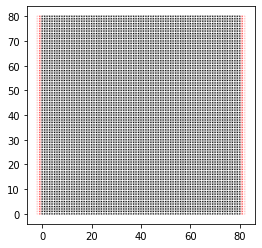

In [5]:
kwant.plot(sysf_1, site_color=lambda site: \
           sysf_1.hamiltonian(site, site), colorbar=False);

For the case of free electrons travelling through the system (with no additional on-site energy) I calculate the transmission coefficient of the system as a function of energy of the incident electrons from the left side.

In [6]:
# function required to calculate the transmission coefficient
def calc_transmission(syst, ene):
    smatrix = kwant.smatrix(syst, ene)
    return smatrix.transmission(0, 1)

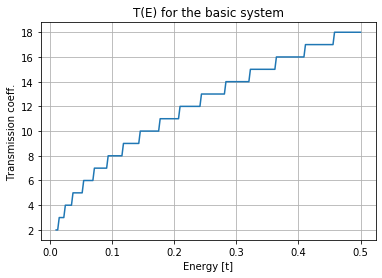

In [7]:
# plotting the transmission coefficient
res_1 = [calc_transmission(sysf_1, i) for i in np.linspace(0.01, 0.5, 200)]
plt.title("T(E) for the basic system")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.5, 200), res_1)

 As the value of energy increases, the transmission coefficient increases, however it is not a linear plot.
 It can be said that the T(E) is quantized as the energy increases, because the energy states 
 allowed for electrons are also quantized. Energy states are based on the energy required to move
 from one energy level to another.
 The higher the energy, the more of it is required to increase the transmission coefficient.

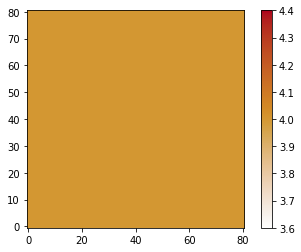

In [8]:
# plotting onsite energy for the basic system
kwant.plotter.map(sys_1, lambda s: potential_1(s));

The onsite energy is constant.

In [9]:
# plotting the density probability
def plot_wf_1(energy=0.01):
   
    # we extract the wave function
    wfs_1 = kwant.wave_function(sysf_1, energy=energy)
    scattering_wf_1 = wfs_1(0)
    print("Energy:", energy)
    kwant.plotter.map(sysf_1, np.sum(abs(scattering_wf_1)**2, axis=0))

interact(plot_wf_1, energy=(0.01, 0.5, 0.01))

interactive(children=(FloatSlider(value=0.01, description='energy', max=0.5, min=0.01, step=0.01), Output()), …

<function __main__.plot_wf_1(energy=0.01)>

Probability density is energy-dependent. However, for every energy level the regions with the highest probability density are located at the upper and the lower edge of the system. As the "energy step" changes, these regions may also appear closer to the middle of the system for a few energy values and the probability density value at the top and bottom edges gets lower as the energy rises. Number of higher probability density regions (red stripes) corresponds directly to the value of transmission coefficient.

Below you can find probability density plots for given energy levels.

Energy: 0.1


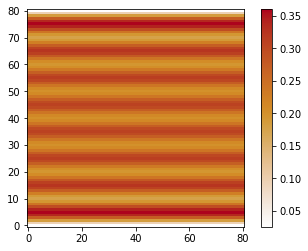

In [52]:
plot_wf_1(0.1)

Energy: 0.14


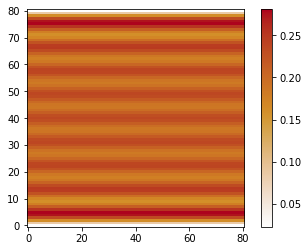

In [54]:
plot_wf_1(0.14)

Energy: 0.17


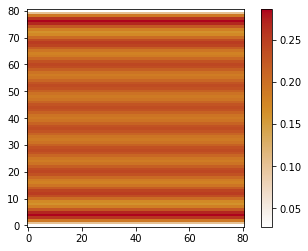

In [55]:
plot_wf_1(0.17)

The next step is to calculate the transmission coefficient with additional on-site parabolic potential in the traverse direction.

In [10]:
# Additional onsite parabolic potential
def parabolic(y):
        return ((40-y)/40)**2

def potential_2(site):
    (x, y) = site.pos
    
    return 4*t + parabolic(y)

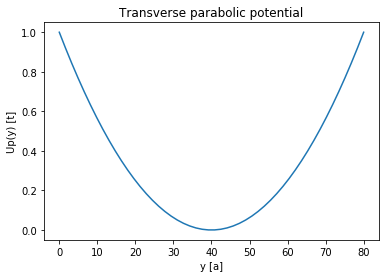

In [11]:
test = [parabolic(i) for i in np.linspace(0, 80)]
plt.title("Transverse parabolic potential")
plt.xlabel("y [a]")
plt.ylabel("Up(y) [t]")
plt.plot(np.linspace(0, 80), test)

The second system is the same as the first one, but every onsite energy is affected by additional parabolic potential. It causes the energy required to travel through the system to be higher.

In [12]:
sys_2 = kwant.Builder()
lat_2 = kwant.lattice.square(a, norbs = 1)

sys_2[(lat_2(x, y) for x in range(size) for y in range(size))] = potential_2
sys_2[lat_2.neighbors()] = -t

leadl_2 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))    
leadl_2[[lat_2(0,i) for i in range(size)]] = potential_2
leadl_2[lat_2.neighbors()] = -t

sys_2.attach_lead(leadl_2)
sys_2.attach_lead(leadl_2.reversed())

sysf_2 = sys_2.finalized()

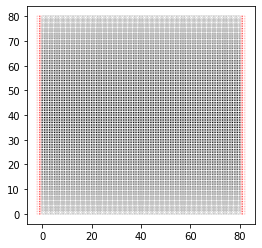

In [13]:
kwant.plot(sysf_2, site_color=lambda site: sysf_2.hamiltonian(site, site), colorbar=False);

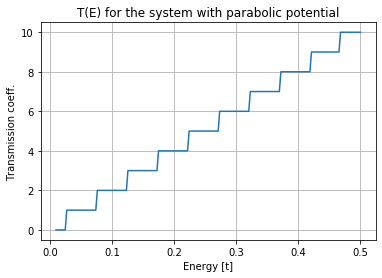

In [14]:
res_2 = [calc_transmission(sysf_2, i) for i in np.linspace(0.01, 0.5, 200)]
plt.title("T(E) for the system with parabolic potential")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.5, 200), res_2)

Transmission coefficient has lower values for this system. It also varies a bit more. The "steps" are still visible, however. 
It is worth to note that energy required to increase the transmission coefficient is constant, in contrary to the basic system, where increasing transmission coefficient to another level requires more and more energy.

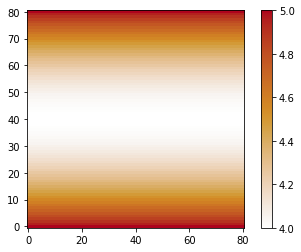

In [15]:
kwant.plotter.map(sys_2, lambda s: potential_2(s));

In [56]:
# plotting the density probability
def plot_wf_2(energy=0.01):
   
    # we extract the wave function
    wfs_2 = kwant.wave_function(sysf_2, energy=energy)
    scattering_wf_2 = wfs_2(0)
    print("Energy:", energy)
    kwant.plotter.map(sysf_2, np.sum(abs(scattering_wf_2)**2, axis=0))

interact(plot_wf_2, energy=(0.01, 0.5, 0.01))

interactive(children=(FloatSlider(value=0.01, description='energy', max=0.5, min=0.01, step=0.01), Output()), …

<function __main__.plot_wf_2(energy=0.01)>

Energy: 0.1


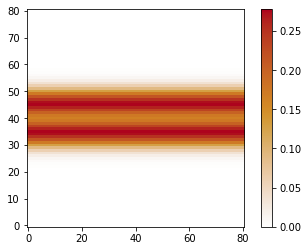

In [57]:
plot_wf_2(0.1)

Energy: 0.15


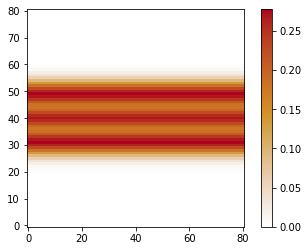

In [58]:
plot_wf_2(0.15)

Energy: 0.2


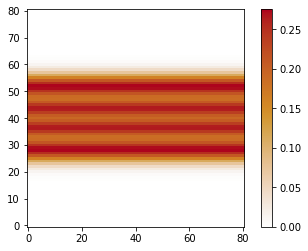

In [59]:
plot_wf_2(0.2)

The probability density plot looks very different to the previous one. For energy values lower than the value of the on-site parabolic potential, the system creates a "barrier", which does not let the electrons to move transversly through the system. However, there is a similarity to the system without additional on-site energy. Number of "red stripes" also directly corresponds to the value of transmission coefficient.

Another test is performed by adding a single attractive scattering potential in the centre of the system and then analyzing the calculated transmission coefficient.
Scattering potential is given in the following form:  
$U_s(\vec{r})=Aexp(-\frac{1}{2}(\frac{\vec{r}-\vec{r_0}}{\sigma})^2))$

Where:  
$\vec{r} = (x, y), 
A = -0.2t, 
\sigma = 5a$.

In [17]:
# single scattering centre, A = -0.2t
x0 = size//2
y0 = size//2

def gauss(x, y, AG, sigma):
    return AG * np.exp(-0.5*(((x-x0)**2 + (y-y0)**2)/sigma**2))

def potential_3(site):
    x, y = site.pos
    return 4*t + parabolic(y) + gauss(x, y, -0.2, 5)

In [18]:
sys_3 = kwant.Builder()
lat_3 = kwant.lattice.square(a, norbs = 1)

sys_3[(lat_3(x, y) for x in range(size) for y in range(size))] = potential_3
sys_3[lat_3.neighbors()] = -t

leadl_3 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))    
leadl_3[[lat_3(0, i) for i in range(size)]] = potential_3
leadl_3[lat_3.neighbors()] = -t

sys_3.attach_lead(leadl_3)
sys_3.attach_lead(leadl_3.reversed())

sysf_3 = sys_3.finalized()

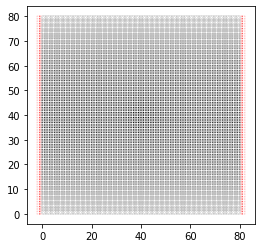

In [19]:
kwant.plot(sysf_3, site_color=lambda site: \
           sysf_3.hamiltonian(site, site), colorbar=False);

For better information about the plot, the sampling has been increased up to 200 points to avoid discretization issues. The upper limit of energy has been contained, but the lower limit has been moved to 0.01 eV to check whether "dips" also appear for lower energies.

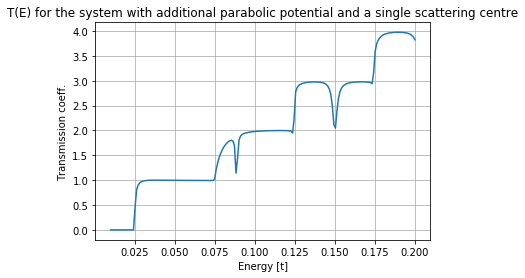

In [21]:
res_3 = [calc_transmission(sysf_3, i) for i in np.linspace(0.01, 0.2, 200)]
plt.title("T(E) for the system with additional parabolic potential and a single scattering centre")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.2, 200), res_3)

Dips on the plot appear in a few places. To check the difference between points corresponding to those dips and other points, a few of them near the dips have been checked manually. The dips are caused by on-site energies lower than the default value of 4t. The difference has been observed for the following energies: 
0.150, 0.088,
and the plots of the density probability are presented below.

In [61]:
# plotting the density probability
def plot_wf_3(energy=0.01):
   
    # we extract the wave function
    wfs_3 = kwant.wave_function(sysf_3, energy=energy)
    scattering_wf_3 = wfs_3(0)
    print("Energy:", energy, "eV")
    kwant.plotter.map(sysf_3, np.sum(abs(scattering_wf_3)**2, axis=0))

Energy: 0.15 eV


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.62% of values overflowing upper limit 1.77119 
  


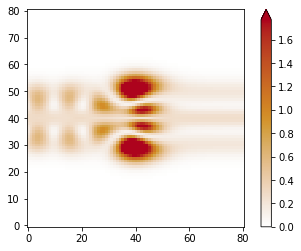

In [60]:
plot_wf_3(0.15)

Energy: 0.088 eV


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.89% of values overflowing upper limit 2.28975 
  


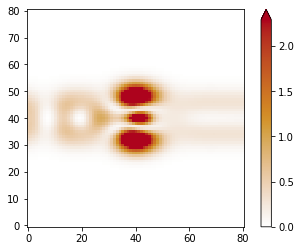

In [65]:
plot_wf_3(0.088)

The plots above show that electrons may be trapped by the attractive potential and only a few of them can leave it by reflecting back to the beginning of the system, or continue to travel through it.

For all the plots above, maximum probability density's value is over 1 before or very close to reaching the scattering centre. 

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: The plotted data contains 0.26% of values underflowing lower limit 3.81975 
  """Entry point for launching an IPython kernel.


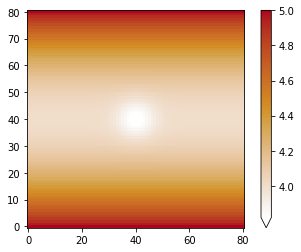

In [29]:
kwant.plotter.map(sys_3, lambda s: potential_3(s));

To compare these results, we create a new system with scattering center given by $A = 0.2t$ and analyze the results in the same manner as before.

In [30]:
# single scattering centre, A = 0.2t
def potential_4(site):
    x, y = site.pos
    return 4*t + parabolic(y) + gauss(x, y, 0.2, 5)

In [31]:
sys_4 = kwant.Builder()
lat_4 = kwant.lattice.square(a, norbs = 1)

sys_4[(lat_4(x, y) for x in range(size) for y in range(size))] = potential_4
sys_4[lat_4.neighbors()] = -t

leadl_4 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))    
leadl_4[[lat_4(0, i) for i in range(size)]] = potential_4
leadl_4[lat_4.neighbors()] = -t

sys_4.attach_lead(leadl_4)
sys_4.attach_lead(leadl_4.reversed())

sysf_4 = sys_4.finalized()

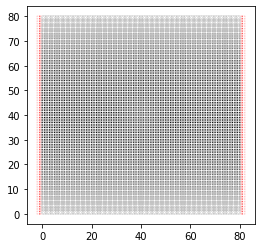

In [32]:
kwant.plot(sysf_4, site_color=lambda site: \
           sysf_4.hamiltonian(site, site), colorbar=False);

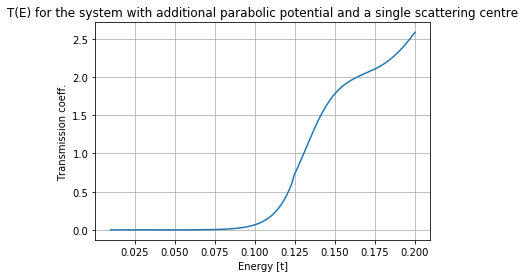

In [33]:
res_4 = [calc_transmission(sysf_4, i) for i in np.linspace(0.01, 0.2, 200)]
plt.title("T(E) for the system with additional parabolic potential and a single scattering centre")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.2, 200), res_4)

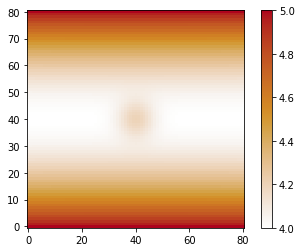

In [34]:
kwant.plotter.map(sys_4, lambda s: potential_4(s));

In [66]:
# plotting the density probability
def plot_wf_4(energy=0.01):
   
    # we extract the wave function
    wfs_4 = kwant.wave_function(sysf_4, energy=energy)
    scattering_wf_4 = wfs_4(0)
    print("Energy:", energy)
    kwant.plotter.map(sysf_4, np.sum(abs(scattering_wf_4)**2, axis=0))
    
interact(plot_wf_4, energy=(0.01, 0.2, 0.01))

interactive(children=(FloatSlider(value=0.01, description='energy', max=0.2, min=0.01, step=0.01), Output()), …

<function __main__.plot_wf_4(energy=0.01)>

Energy: 0.14


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.51% of values overflowing upper limit 0.719443 
  


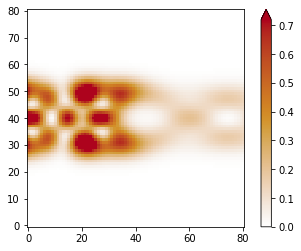

In [67]:
plot_wf_4(0.14)

T(E) function shows that there's no more dips on the plot. The probability density plots show that the scattering potential causes electrons to deflect back until they reach the energy high enough to beat the barrier. After they meet the scattering potential, assuming they have the energy high enough to get through it, there is a chance that they will continue to travel through the system.

The probability density plot for energy = 0.14t (as seen above) shows that a part of electrons for transmission coefficient greater than 1 are bypassing the middle of the system. Such distribution of probability density is caused by the electrons trying to evade the higher potential, thus maintaining the lowest possible energy.

Another system will have scattering potential containing two gaussian terms:  

$U_s(\vec{r})=A_1exp(-\frac{1}{2}(\frac{\vec{r}-\vec{r_0}}{\sigma_1})^2)) + A_2exp(-\frac{1}{2}(\frac{\vec{r}-\vec{r_0}}{\sigma_2})^2))$  
Where:  
$A_1 = 0.2t, \sigma_1 = 15a$,  
$A_2 = -0.4t, \sigma_2 = 5a$.

In [36]:
# single scattering centre, two gaussian terms
def potential_5(site):
    x, y = site.pos
    return 4*t + parabolic(y) + gauss(x, y, 0.2, 15) + gauss(x, y, -0.4, 5)

In [37]:
sys_5 = kwant.Builder()
lat_5 = kwant.lattice.square(a, norbs = 1)

sys_5[(lat_5(x, y) for x in range(size) for y in range(size))] = potential_5
sys_5[lat_5.neighbors()] = -t

leadl_5 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))    
leadl_5[[lat_5(0, i) for i in range(size)]] = potential_5
leadl_5[lat_5.neighbors()] = -t

sys_5.attach_lead(leadl_5)
sys_5.attach_lead(leadl_5.reversed())

sysf_5 = sys_5.finalized()

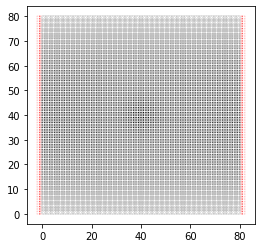

In [38]:
kwant.plot(sysf_5, site_color=lambda site: \
           sysf_5.hamiltonian(site, site), colorbar=False);

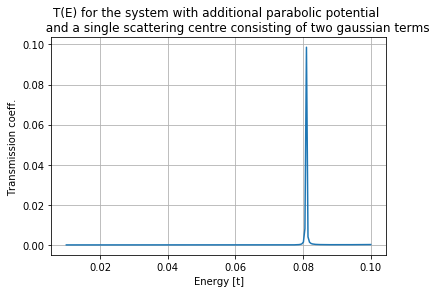

In [39]:
res_5 = [calc_transmission(sysf_5, i) for i in np.linspace(0.01, 0.1, 200)]
plt.title("""T(E) for the system with additional parabolic potential 
          and a single scattering centre consisting of two gaussian terms""")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.1, 200), res_5)

For energy in a given range, there is only one peak for energy = 0.081. Let's try to research it further by narrowing the energy range to 0.0805-0.0815.

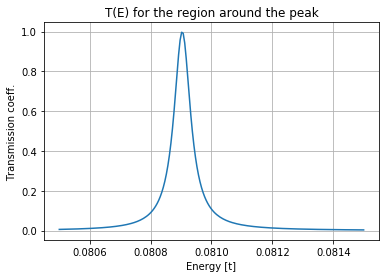

In [70]:
res_p = [calc_transmission(sysf_5, i) for i in np.linspace(0.0805, 0.0815, 200)]
plt.title("""T(E) for the region around the peak""")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.0805, 0.0815, 200), res_p)

The peak appears for the energy 0.0809t.

In [71]:
# plotting the density probability
def plot_wf_5(energy=0.01):
   
    # we extract the wave function
    wfs_5 = kwant.wave_function(sysf_5, energy=energy)
    scattering_wf_5 = wfs_5(0)
    print("Energy:", energy)
    kwant.plotter.map(sysf_5, np.sum(abs(scattering_wf_5)**2, axis=0))
    
#kwant.plotter.density(sysf_1, density)

interact(plot_wf_5, energy=(0.01, 0.1, 0.01))

interactive(children=(FloatSlider(value=0.01, description='energy', max=0.1, min=0.01, step=0.01), Output()), …

<function __main__.plot_wf_5(energy=0.01)>

Energy: 0.0809


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.74% of values overflowing upper limit 74.3077 
  


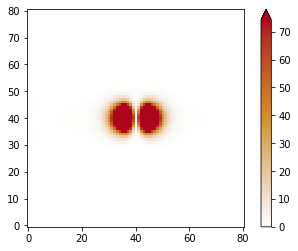

In [78]:
plot_wf_5(0.0809)

Energy: 0.0812


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.68% of values overflowing upper limit 0.983378 
  


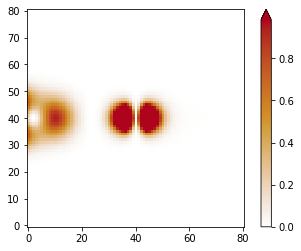

In [74]:
plot_wf_5(0.0812)

Energy: 0.0806


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.71% of values overflowing upper limit 0.952611 
  


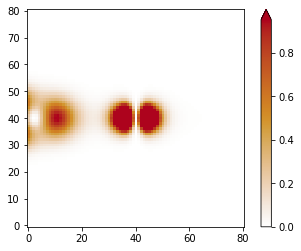

In [79]:
plot_wf_5(0.0806)

Energy: 0.08


C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: The plotted data contains 1.68% of values overflowing upper limit 0.426611 
  


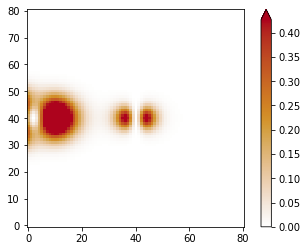

In [80]:
plot_wf_5(0.08)

In this case, transmission coefficient function doesn't behave like previous functions, as it loses its' step-like behavior. There is only one for an exact energy (0.0809t). Such energy causes all the electrons to be able to get inside the potential, but they can't get out. The shape is very similar to the 2p orbital . 

For energies being only 0.0003t apart, some of the electrons may not get inside the potential and they will get reflected. The bigger the difference between energy for this peak and a given point, the bigger the chance of reflection.

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: The plotted data contains 0.78% of values underflowing lower limit 3.90884 
  """Entry point for launching an IPython kernel.


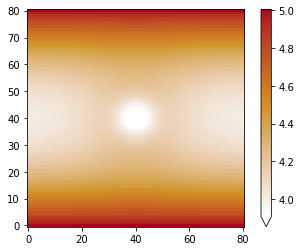

In [41]:
kwant.plotter.map(sys_5, lambda s: potential_5(s));

The last research is performed by defining random points in the system to apply several scattering centers inside the system. Scattering centers are given by Gaussian term with following parameters:  
$A = 0.2t, \sigma = 4$

In [42]:
centres_num = 200

def randomizer(site):
    x, y = site.pos
    potential = 4*t + parabolic(y)
    def gauss(x, y, x_0, y_0, AG, sigma):
        return AG * np.exp(-0.5*(((x-x_0)**2 + (y-y_0)**2)/sigma**2))
    for i in range(0, centres_num):
        x_0 = random_points[i*2]
        y_0 = random_points[i*2 + 1]
        potential += gauss(x, y, x_0, y_0, 0.2, 4)
        
    return potential

In [87]:
random_points = [random.randint(0, size) for i in range(centres_num*2)]

sys_6= kwant.Builder()
lat_6= kwant.lattice.square(a, norbs = 1)

sys_6[(lat_6(x, y) for x in range(size) for y in range(size))] = randomizer
sys_6[lat_6.neighbors()] = -t

leadl_6 = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))    
leadl_6[[lat_6(0, i) for i in range(size)]] = randomizer
leadl_6[lat_6.neighbors()] = -t

sys_6.attach_lead(leadl_6)
sys_6.attach_lead(leadl_6.reversed())

sysf_6 = sys_6.finalized()

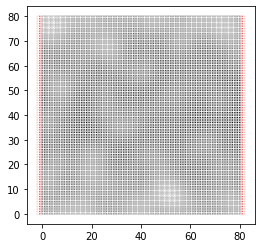

In [88]:
kwant.plot(sysf_6, site_color=lambda site: \
           sysf_6.hamiltonian(site, site), colorbar=False);

C:\Users\1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: The plotted data contains 0.90% of values overflowing upper limit 5.86814 and 0.09% of values underflowing lower limit 4.13359 
  """Entry point for launching an IPython kernel.


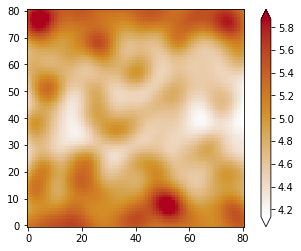

In [89]:
kwant.plotter.map(sys_6, lambda s: randomizer(s));

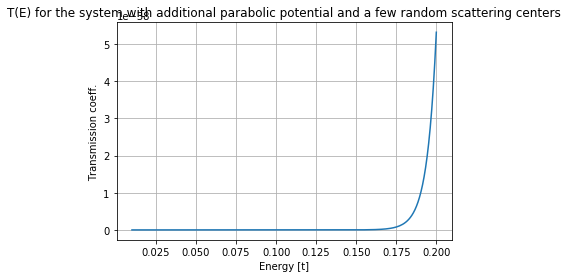

In [46]:
res_6 = [calc_transmission(sysf_6, i) for i in np.linspace(0.01, 0.2, 200)]
plt.title("T(E) for the system with additional parabolic potential and a few random scattering centers")
plt.grid()
plt.xlabel("Energy [t]")
plt.ylabel("Transmission coeff.")

plt.plot(np.linspace(0.01, 0.2, 200), res_6)

After testing a few numbers of random scattering centers, the form of T(E) function usually changes significantly. The more centers are added to the system, the higher the average value of on-site potential for probability density plot. The system is very unpredictable, however for a bigger amount of points there is a really small chance that the system will let the electrons to travel through it. In that case, a peak might appear, although it is unlikely.

It is also worth to note that calculations of T(E) function takes more time for higher number of added scattering centers. A single operation will take a few minutes or more and requires a good computing power.

## Conclusions

1) The systems with the highest T(E) value for a given energy have no additional on-site energy added. Plots of the probability density show regions where electrons are likely to travel through the system. Number of those regions is proportional to the transmission coefficient for a given energy.

2) Additional parabolic potential causes electrons to flow closer to the centre as they aren't able to move through potential increased by the additional y-axis dependent parabolic potential.

3) Single scattering potential makes electrons' path through the system more scattered and the are likely to get affected by it. Attractive potential causes electrons to travel through it or get pulled into, while repellent potential causes them to get reflected back or bypass it.

4) As the scattering centers get more complex, the T(E) function stops resembling the one for systems without any additional potential sources. For certain systems, the distribution of on-site potential may cause the electrons to get "trapped" and never travel across the system.

5) Very complex nanosystems require a very good processor to properly calculate quantities such as transmission coefficient, taking into account every possible component. 